# Project: Investigate a Dataset - [TMDb movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

his dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The description of the various features of the dataset is shown below.
<ul>
<li>1) id - the identification number of the movie in the dataset</li>
<li>2) imdb_idn - the imdb database identification number of the movie in the dataset</li>
<li>3) popularity - the populairty score of the movie represented as a floating point number</li>
<li>4) budget     - the capital allocated to the making of a movie</li>
<li>5) revenue    - the total amount of money made by a movie</li>
<li>6) original_title -the title of the movie</li>
<li>7) cast - the names of the actors and staff involved in the production  of the movie</li>
<li>8) homepage - official website link to the movie</li>
<li>9) director - the director of the movie</li>
<li>10) tagline - catchphrase of the movie</li>
<li>11) keywords - this is a word used describe any notable object, concept, style or action that takes place during a title.</li>
<li>12) overview - short summarry of a movie</li>
<li>13) runtime  - Total watchtime of a movie</li>
<li>14) genres   - a style or category of art, music, or literature.</li>
<li>15) production_companies - company involved in the production of a movie</li>
<li>16) release_date - date of release of a movie</li>
<li>17) vote_count - number of upvotes for a particular movie</li>
<li>18) vote_average - It's the average of all of the TMDb user ratings.</li>
<li>19) release_year - the year of release</li>
<li>20) budget_adj   - budget in terms of 2010 dollars, accounting for inflation over time.</li>
<li>21) revenue_adj  - revenue in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

### Question(s) for Analysis
<ul>
    <li>what is the average runtime of different movie genres</li>
    <li>Which month has the highest average revenue over the years</li>
    <li>What is the total vote average of different movie genres</li>
</ul>

In [99]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [100]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==1.4.2

In [101]:
#!pip install -U jupyter

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [102]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [103]:
#checking how the data looks like
print(df.head(5))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [104]:
#checking the number of samples and columns of the dataset
df.shape

(10866, 21)

In [105]:
#ccheck for duplicate rows
sum(df.duplicated())


1

In [106]:
#lets then inspect the data type of various columns of the dataset to see which one requires modification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

It can be seen from the preceeding cell that the columns; cast,homepage, director,tagline,keywords,overview, genres, production_companies have missing entries. Also the coluumns keywords, genres and production_companies have items separated by the '|' character. This is unacceptable and would need to be rectified. Outlined below is a list of the steps that would be followed in order to make the data in the dataset clean and acceptable.
<ul>
<li>In order to be efficient and as a result of the questions we intend to investigate I intend to drop the columns cast, homepage, tagline and overview from the dataset since they have no bearing on the analysis we intend to carry out</li>
<li>in the budget, budget_adj , revenue, revenue_adj columns any entry that is zero will be considered a missing value and be replaced by the mean</li>
<li>the next step is to drop all rows that have have missing entries after the replacement by the preceeding step and also drop duplicate rows</li>
<li>The next step is to convert the hybrid rows(rows containing items in the keywords, genres and production_companies seperated by the '|' character) and split them into new rows</li>
<li>Finally we are going to convert the release_date and release_year columns to datetime objects and also convert budget and revenue columns to floating point values </li>
</ul>



### Data Cleaning


In [107]:
# we first drop columns cast, homepage, tagline and overview
df.drop(['cast', 'tagline', 'homepage', 'overview'], axis = 1, inplace = True)



in the preceeding cell we dropped the columns cast , tagline , homepage and overview from the dataset since they are not important for the research questions we intend to analyze.

In [108]:
#lets convert budget and revenue columns to floating point values
df['budget'].astype(float)
df['revenue'].astype(float)

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
             ...     
10861    0.000000e+00
10862    0.000000e+00
10863    0.000000e+00
10864    0.000000e+00
10865    0.000000e+00
Name: revenue, Length: 10866, dtype: float64

in the preceeding cell we converted the budget and revenue columns to floating point values. The reason for this will be made clear subsequently

In [109]:
# replace zero values with mean values
df['budget'].replace(0, np.nan, inplace = True)
df['revenue'].replace(0, np.nan, inplace = True)
df['budget_adj'].replace(0, np.nan, inplace = True)
df['revenue_adj'].replace(0, np.nan, inplace = True)

in the preceeding cell we replaced all zero values of columns budget, revenue , budget_adj, revenue_adj with the mean. it is necessary to note that the budget and revenue columns were converted to floating points in order to get accurate values for the mean

In [110]:
#next is drop rows containing missing values and duplicate rows
df.drop_duplicates(inplace = True)


rows containing missing values were dropped in order to ensure the data is clean and uniform

In [111]:
#convert the cells containing '|' into lists
df['keywords'] = df['keywords'].apply(lambda x:x.split('|') if type(x) == str else x)
df['genres'] = df['genres'].apply(lambda x:x.split('|') if type(x) == str else x)
df['production_companies'] = df['production_companies'].apply(lambda x:x.split('|') if type(x) == str else x)

in the cell above we converted the items seperated by the '|' character in to a list. This was done so that we could make use of pandas explode function which will be used subsequently

In [112]:
keyword =df.explode('keywords')

In [113]:
genre = df.explode('genres')

In [114]:
production_companies = df.explode('production_companies')

in the last 3 preceeding cells we used the explode function in pandas to extend the rows containing cells that have the character '|' in to new rows this will be helpful in our later analysis

In [115]:
print(df.tail())

          id    imdb_id  popularity   budget  revenue  \
10861     21  tt0060371    0.080598      NaN      NaN   
10862  20379  tt0060472    0.065543      NaN      NaN   
10863  39768  tt0060161    0.065141      NaN      NaN   
10864  21449  tt0061177    0.064317      NaN      NaN   
10865  22293  tt0060666    0.035919  19000.0      NaN   

                 original_title            director  \
10861        The Endless Summer         Bruce Brown   
10862                Grand Prix  John Frankenheimer   
10863       Beregis Avtomobilya      Eldar Ryazanov   
10864    What's Up, Tiger Lily?         Woody Allen   
10865  Manos: The Hands of Fate    Harold P. Warren   

                                        keywords  runtime  \
10861               [surfer, surfboard, surfing]       95   
10862              [car race, racing, formula 1]      176   
10863               [car, trolley, stealing car]       94   
10864                                    [spoof]       80   
10865  [fire, gun, dr

In [116]:
# convert release date to datetime object
df['release_date'] = pd.to_datetime(df['release_date'])
df['Month'] = df['release_date'].dt.month_name(locale='English')

In the final step of the analysis we convert the release_date column to datetime objecs and extract the month name to a separate column which will be used in our analysis in the subsequent sessions

<a id='eda'></a>
## Exploratory Data Analysis





### what is the average runtime of different movie genres

In [117]:
#group by genre and get the genres and average runtime in two separate lists respectively
Genre = genre.dropna(subset=['genres', 'runtime']).copy() #drops rows where either genres or runtime is empty
cf = Genre.groupby('genres')
labels = [key for key, _ in cf]
Average_runtime = list(Genre.groupby('genres')['runtime'].mean())

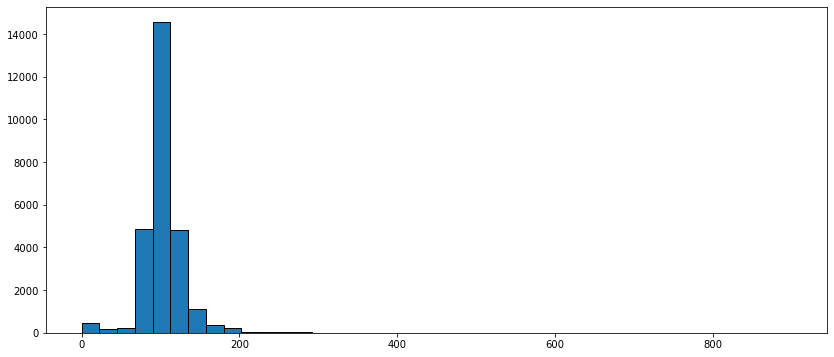

In [118]:
Genre['runtime'].hist(grid = False , bins = 40 , edgecolor = 'black', figsize = [14,6])

As we can observe the average runtime is heavily skewed to the right.

In [119]:
#function to plot barchart
''' takes in a list of labels and a list of their corresponding values and plots a barchart'''
def plot_chart(xlabel, ylabel, title, labels, values):
    y_pos = [i for i, _ in enumerate(labels)]
    plt.barh(y_pos, values, color='green')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.yticks(y_pos, labels)
    plt.show()


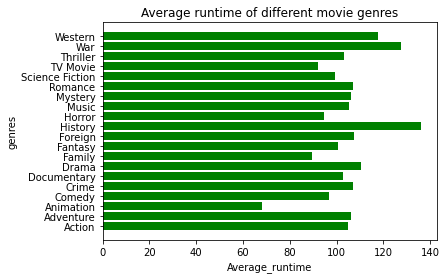

In [120]:
#barchart of genres against average runtime
plot_chart('Average_runtime','genres', 'Average runtime of different movie genres', labels, Average_runtime)

From the above analysis we can see that historical movies have the highest average watchtime while animated movies have the lowest average runtime. Although this is my opinion but I feel the reason that the average runtime of animation is low is because the genres are usually geared towards very young audience with short attention span

### Which month has the highest average revenue over the years

In [121]:
#group by month and then get the names of the month in to a list and the average_revenue into a list
Month_df = df.dropna(subset =['Month','revenue']).copy()
cf = Month_df.groupby('Month')
month_labels = [key for key, _ in cf]
Average_revenue = list(Month_df.groupby('Month')['revenue'].mean())

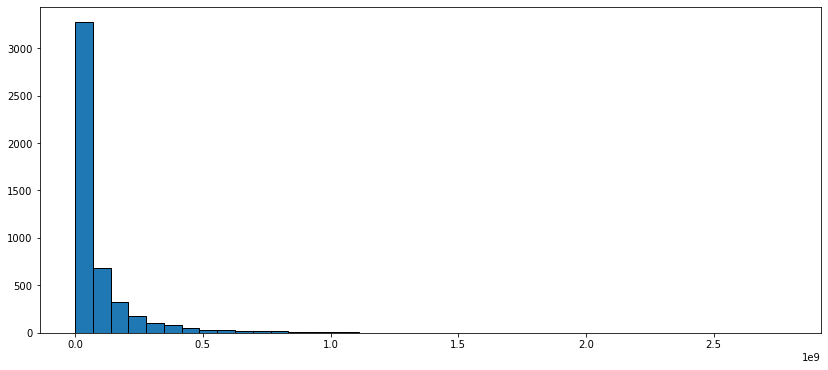

In [122]:
Month_df['revenue'].hist(grid = False , bins = 40 , edgecolor = 'black', figsize = [14,6])

As we can see from the histogram the revenues are heavily skewed to the right

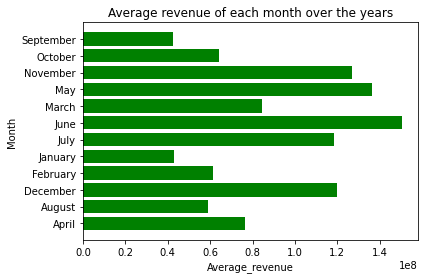

In [123]:
#plot barchart of month against average revenue
plot_chart("Average_revenue","Month","Average revenue of each month over the years", month_labels, Average_revenue)

The month with the highest average revenue is June while the month with the Lowest Average revenue is January. it is possible that there are hidden factors that makes this to be case.

### What is the total vote average of different movie genres

In [124]:
#group by genres and get the list of different genres and their total vote average
genre.dropna(subset=['genres', 'vote_average'], inplace = True) #drops rows where either genres or runtime is empty
cf = genre.groupby('genres')
labels = [key for key, _ in cf]
Total_vote_average = list(genre.groupby('genres')['vote_average'].sum())

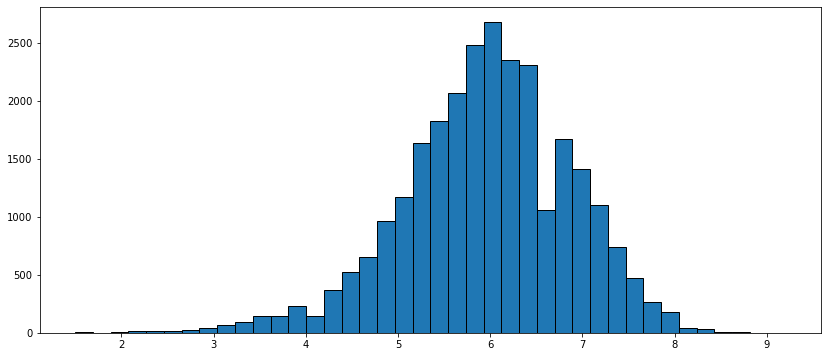

In [125]:
genre['vote_average'].hist(grid = False , bins = 40 , edgecolor = 'black', figsize = [14,6])

The vote averages are slightly skewed to the left

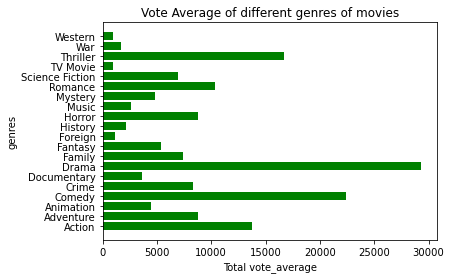

In [126]:
# barchart of genres against total vote average
plot_chart("Total vote_average","genres","Vote Average of different genres of movies",labels, Total_vote_average)

From the graph above we can see that the genre with the highest vote average is Drama. while the genre with lowest vote average is Foreign.

<a id='conclusions'></a>
## Conclusions

Here is a summary of the findings from our research questions
<ul>
<li>For the first research question we can see from the barchart that Historical movies have the higherst Average runtime while animation has the lowest Average runtime.I will like to assume that the type audience that a particular genre of movie is directed to determines the runtime however this needs to be investigated more</li>
<li>In the analysis for the second research question we can see that the month with the Highest revenue on average is June while the month with the Lowest revenue on Average is January. I sincerely believe there are underlying factors that makes this observation the way it is. for example the month of june might be filled with a lot of holidays hence people can make out time to visit the movies frequently. However since the variables  in the dataset does not give us an opportunity to verify the above assumption it is best not to assume.</li>
<li>In the final research question we investigate the total vote average of different movie genres. we can see that  the genre with the highes total vote_average is drama while the genre with the lowest vote_average is foreign. This requires more investigation to ascertain whether people like the drama genre compared to other genres</li>
</ul>

   The limitation of the exploration is that we can't ascertain why some observations are the way they are from the dataset for example it would be nice to know the undelying factors that make the runtime of animated movies to be lower than other genres. Although some assumptions can be made , however from the data given to us we can never know for sure.
   
   Another limitation of the exploration has to do with the dataset There is a fair amount of missing values in the dataset and this is bound to affect the accuracy of our analysis



NB: Apart from the matplotlib and pandas documentation no other external source was consulted in the making of this project

## Submitting your Project 



In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0